## 0. Introdução

A análise abaixo foi feita utilizando dados públicos que foram disponibilizados no site www.kaggle.com.

A motivação para essa análise é entender o gerenciamento do setor Agropecuário brasileiro. Isso pode ser importante para prevenir perdas, diminuir custos operacionais e melhorar a capacidade de produção, o que, consequentemente, deve aumentar a produtividade do setor.

Perguntas que tentaremos responder com a análise:


- Contagem estimada de insetos na lavoura (Estimated_Insects_Count);    
- Tipo de Corte (Crop_Type);                  
- Tipo de Solo (Soil_Type);                  
- Categoria de Uso de Pesticidas (Pesticide_Use_Category); 
- Número de doses da semana (Number_Doses_Week);          
- Número de semanas usadas (Number_Weeks_Used);        
- Número de semanas de encerramento (Number_Weeks_Quit);          
- Estação "Temporada" (Season);                     
- Danos às culturas (Crop_Damage);               

## 1. Carregando Bibliotecas

In [2]:
#Importação de Pacotes
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## 2. Carregando Dataset

In [4]:
#Conexão com os Dados
train_d = pd.read_csv('Treino.csv')

In [8]:
#Visualiza as 10 Primeiras Linhas
train_d.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


## 3. Identificando os Atributos do Conjunto de Dados

In [14]:
#Informações dos Atributos do Dataset
train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


## 4. Analisando as Variáveis

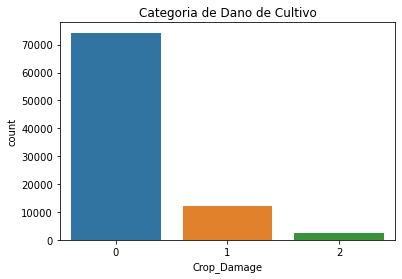

In [42]:
#Explorando a Variável resposta
train_d['Crop_Damage'].value_counts()
ax = sns.countplot(x=train_d["Crop_Damage"])
_= plt.title("Categoria de Dano de Cultivo")

Analisando esse gráfico de Categoria de Dano de Cultivo, podemos analisar a categoria de dano de cultivo, onde "0" significa que não houve nenhum dano nas lavouras, "1" significa que houve algum dano nas lavouras por meio de pragas e outros(efeitos climáticos etc) e "2" significa que houve danos nas lavouras por meio de pesticidas.

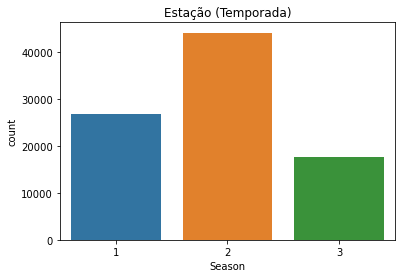

In [29]:
#Explorando a Variável
train_d['Season'].value_counts()
ax = sns.countplot(x=train_d["Season"])
_= plt.title("Estação (Temporada)")

Este gráfico Season analisa a produção por temporada, onde a temporada 2 se mostra a mais produtiva em relação a temporada 1 e 3.
 Uma das hipóteses que justifique maior produtividade neste período do ano são as condições climáticas mais favoráveis.

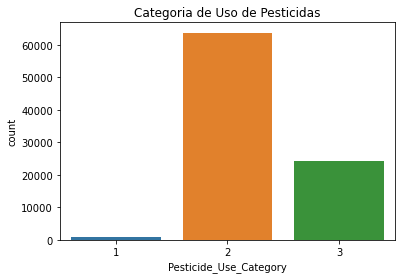

In [22]:
#Eplorando a Variável
train_d['Pesticide_Use_Category'].value_counts()
ax = sns.countplot(x=train_d["Pesticide_Use_Category"])
_= plt.title("Categoria de Uso de Pesticidas") 

Este gráfico de Categoria de Uso de Pesticida analisa a quantidade de pesticidas utilizados nas lavouras,
onde "1" significa que não foi utilizado nenhum tipo de pesticida nas lavouras, "2" significa que foi
utlizado algum tipo de pesticida em algum período de plantio das lavouras e "3" significa que foi utilizado pesticidas em todo período de plantio das lavouras.

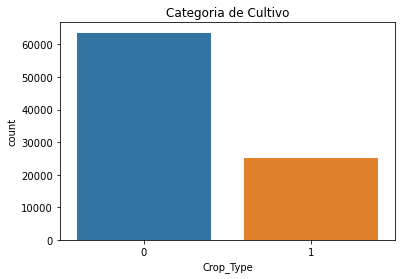

In [5]:
#Explorando a Variável
train_d['Crop_Type'].value_counts()
ax = sns.countplot(x=train_d["Crop_Type"])
_= plt.title("Categoria de Cultivo")

Este gráfico de Categoria de Cultivo analisa a qualidade do cultivo nas lavouras, onde "0" significa que o cultivo foi realizado dentro dos padrões estabelecidos, sem nenhum tipo de incidente, "1" significa que a colheita sofreu algum tipo de incidente, isso não significa necessariamente que o incidente causado comprometeu ou comprometerá a colheita.

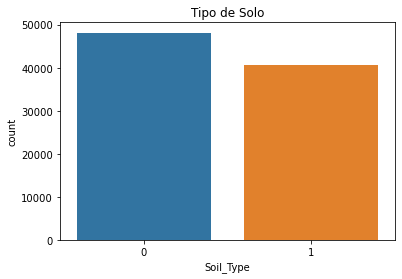

In [24]:
#Explorando a variável
train_d['Soil_Type'].value_counts()
ax = sns.countplot(x=train_d["Soil_Type"])
_= plt.title("Tipo de Solo")

Este gráfico de Tipo de Solo analisa a qualidade do solo onde o plantio será feito, onde "0" significa boas condições do solo para realizar o plantio, e "1" significa que o solo necessita de maiores preparos para realização do plantio por exemplo: maior quantidade de fertilizantes etc..

In [23]:
#Verificando valores nulos
train_d.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [26]:
#Verifica valores duplicados
train_d.duplicated().sum()

0

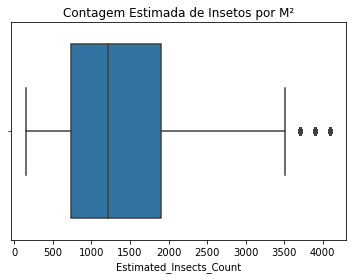

In [6]:
#Estatística descritiva
train_d['Estimated_Insects_Count'].describe()
ax = sns.boxplot(x=train_d["Estimated_Insects_Count"])
_= plt.title("Contagem Estimada de Insetos por M²")

Este gráfico de Contagem Estimada de Insetos por M² analisa a quantidade estimada de insetos por metro quadrado nas lavouras.

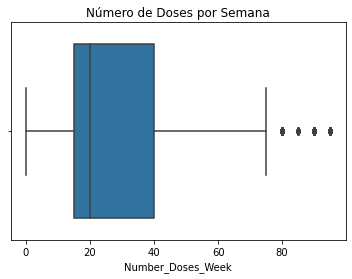

In [7]:
#Verifica valores descritiva
train_d['Number_Doses_Week'].describe()
ax = sns.boxplot(x=train_d["Number_Doses_Week"])
_= plt.title("Número de Doses por Semana")

Este gráfico de Número de Doses por Semana analisa a quantidade de doses de pesticidas utlizados por semana.

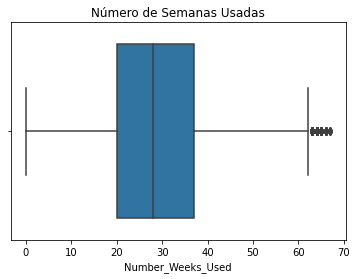

In [39]:
#Estatística descritiva
train_d['Number_Weeks_Used'].describe()
ax = sns.boxplot(x=train_d["Number_Weeks_Used"])
_= plt.title("Número de Semanas Usadas")

Este gráfico de Número de Semanas Usadas analisa a quantidade de semanas que foi feito o uso de pesticidas.

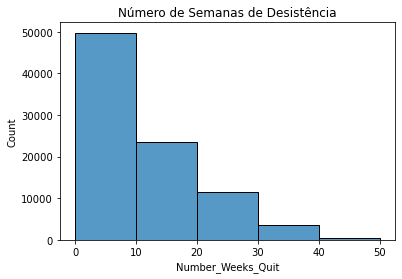

In [43]:
#Estastistica descritiva
train_d['Number_Weeks_Quit'].describe()
ax = sns.histplot(x=train_d["Number_Weeks_Quit"], bins=5)
_= plt.title("Número de Semanas de Desistência")

Este gráfico de Número de Semanas de Desistência analisa a quantidade de semanas onde houve a desistência do uso de pesticida.

## 5. PRÉ-PROCESSAMENTO DE DADOS

#Exlcuir a variável ID pois ela não é explicativa
train_d.drop('ID', axis=1,inplace=True)
train_d.head()

In [51]:
#Exclusão dos valores ausentes
train_d.dropna(inplace=True)

In [42]:
train_d.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [58]:
# One-Hot Encoder - Criação de variáveis Númericas
for col in ['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season']:
    train_d = pd.get_dummies(train_d, columns=[col])

In [47]:
train_d.head(2)
train_d.shape

(79858, 9)

In [60]:
# Split dataset
X = train_d.drop(['Crop_Damage'], axis=1)
y = train_d['Crop_Damage'].values.reshape(-1,1)

# Amostragem dos dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=7)

## 6.CONSTRUÇÃO DAS MÁQUINAS PREDITIVAS

In [61]:
#Treinamento da Máquina Preditiva
Maquina_Preditiva = CatBoostClassifier(n_estimators=1000, max_depth=4, random_state=7)
Maquina_Preditiva.fit(X_train, y_train)
predicoes = Maquina_Preditiva.predict_proba(X_test)

Learning rate set to 0.097814
0:	learn: 0.9832092	total: 195ms	remaining: 3m 15s
1:	learn: 0.8949168	total: 209ms	remaining: 1m 44s
2:	learn: 0.8266158	total: 219ms	remaining: 1m 12s
3:	learn: 0.7706912	total: 229ms	remaining: 57s
4:	learn: 0.7241909	total: 239ms	remaining: 47.5s
5:	learn: 0.6857756	total: 249ms	remaining: 41.2s
6:	learn: 0.6533072	total: 258ms	remaining: 36.6s
7:	learn: 0.6249385	total: 266ms	remaining: 33s
8:	learn: 0.6010892	total: 275ms	remaining: 30.3s
9:	learn: 0.5798398	total: 283ms	remaining: 28s
10:	learn: 0.5617840	total: 292ms	remaining: 26.2s
11:	learn: 0.5470850	total: 300ms	remaining: 24.7s
12:	learn: 0.5335494	total: 308ms	remaining: 23.4s
13:	learn: 0.5221289	total: 316ms	remaining: 22.3s
14:	learn: 0.5116100	total: 325ms	remaining: 21.3s
15:	learn: 0.5023982	total: 333ms	remaining: 20.5s
16:	learn: 0.4942070	total: 341ms	remaining: 19.7s
17:	learn: 0.4877251	total: 349ms	remaining: 19s
18:	learn: 0.4815039	total: 359ms	remaining: 18.5s
19:	learn: 0.476

166:	learn: 0.4179882	total: 1.7s	remaining: 8.49s
167:	learn: 0.4179616	total: 1.71s	remaining: 8.48s
168:	learn: 0.4178610	total: 1.72s	remaining: 8.48s
169:	learn: 0.4177243	total: 1.73s	remaining: 8.46s
170:	learn: 0.4177015	total: 1.74s	remaining: 8.45s
171:	learn: 0.4176729	total: 1.75s	remaining: 8.43s
172:	learn: 0.4176411	total: 1.76s	remaining: 8.42s
173:	learn: 0.4175867	total: 1.77s	remaining: 8.4s
174:	learn: 0.4175426	total: 1.78s	remaining: 8.39s
175:	learn: 0.4174820	total: 1.79s	remaining: 8.38s
176:	learn: 0.4174466	total: 1.8s	remaining: 8.36s
177:	learn: 0.4173537	total: 1.81s	remaining: 8.35s
178:	learn: 0.4173002	total: 1.82s	remaining: 8.34s
179:	learn: 0.4172489	total: 1.83s	remaining: 8.33s
180:	learn: 0.4172165	total: 1.84s	remaining: 8.32s
181:	learn: 0.4171912	total: 1.85s	remaining: 8.3s
182:	learn: 0.4171467	total: 1.86s	remaining: 8.29s
183:	learn: 0.4171124	total: 1.86s	remaining: 8.27s
184:	learn: 0.4170874	total: 1.87s	remaining: 8.26s
185:	learn: 0.41

333:	learn: 0.4123394	total: 3.22s	remaining: 6.42s
334:	learn: 0.4122790	total: 3.23s	remaining: 6.41s
335:	learn: 0.4122644	total: 3.24s	remaining: 6.4s
336:	learn: 0.4121866	total: 3.25s	remaining: 6.39s
337:	learn: 0.4121405	total: 3.25s	remaining: 6.38s
338:	learn: 0.4121220	total: 3.26s	remaining: 6.36s
339:	learn: 0.4121177	total: 3.27s	remaining: 6.35s
340:	learn: 0.4120978	total: 3.28s	remaining: 6.34s
341:	learn: 0.4120879	total: 3.29s	remaining: 6.33s
342:	learn: 0.4120155	total: 3.3s	remaining: 6.32s
343:	learn: 0.4119935	total: 3.31s	remaining: 6.3s
344:	learn: 0.4119497	total: 3.31s	remaining: 6.29s
345:	learn: 0.4119334	total: 3.32s	remaining: 6.28s
346:	learn: 0.4119181	total: 3.33s	remaining: 6.27s
347:	learn: 0.4118949	total: 3.34s	remaining: 6.25s
348:	learn: 0.4118638	total: 3.35s	remaining: 6.24s
349:	learn: 0.4118526	total: 3.35s	remaining: 6.23s
350:	learn: 0.4118459	total: 3.36s	remaining: 6.21s
351:	learn: 0.4118398	total: 3.37s	remaining: 6.2s
352:	learn: 0.41

503:	learn: 0.4088095	total: 4.68s	remaining: 4.61s
504:	learn: 0.4087966	total: 4.69s	remaining: 4.6s
505:	learn: 0.4087824	total: 4.7s	remaining: 4.59s
506:	learn: 0.4087765	total: 4.71s	remaining: 4.58s
507:	learn: 0.4087558	total: 4.72s	remaining: 4.57s
508:	learn: 0.4087345	total: 4.73s	remaining: 4.56s
509:	learn: 0.4087304	total: 4.74s	remaining: 4.55s
510:	learn: 0.4087003	total: 4.74s	remaining: 4.54s
511:	learn: 0.4086925	total: 4.75s	remaining: 4.53s
512:	learn: 0.4086675	total: 4.76s	remaining: 4.52s
513:	learn: 0.4086641	total: 4.77s	remaining: 4.51s
514:	learn: 0.4086519	total: 4.78s	remaining: 4.5s
515:	learn: 0.4086406	total: 4.79s	remaining: 4.49s
516:	learn: 0.4086212	total: 4.79s	remaining: 4.48s
517:	learn: 0.4085949	total: 4.8s	remaining: 4.47s
518:	learn: 0.4085868	total: 4.81s	remaining: 4.46s
519:	learn: 0.4085710	total: 4.82s	remaining: 4.45s
520:	learn: 0.4085470	total: 4.83s	remaining: 4.44s
521:	learn: 0.4085420	total: 4.83s	remaining: 4.43s
522:	learn: 0.40

672:	learn: 0.4064273	total: 6.22s	remaining: 3.02s
673:	learn: 0.4064175	total: 6.23s	remaining: 3.01s
674:	learn: 0.4064034	total: 6.24s	remaining: 3s
675:	learn: 0.4063953	total: 6.25s	remaining: 2.99s
676:	learn: 0.4063708	total: 6.25s	remaining: 2.98s
677:	learn: 0.4063676	total: 6.26s	remaining: 2.97s
678:	learn: 0.4063591	total: 6.27s	remaining: 2.96s
679:	learn: 0.4063429	total: 6.28s	remaining: 2.96s
680:	learn: 0.4063325	total: 6.29s	remaining: 2.94s
681:	learn: 0.4063206	total: 6.3s	remaining: 2.94s
682:	learn: 0.4063051	total: 6.31s	remaining: 2.93s
683:	learn: 0.4062921	total: 6.32s	remaining: 2.92s
684:	learn: 0.4062821	total: 6.33s	remaining: 2.91s
685:	learn: 0.4062753	total: 6.33s	remaining: 2.9s
686:	learn: 0.4062582	total: 6.34s	remaining: 2.89s
687:	learn: 0.4062183	total: 6.35s	remaining: 2.88s
688:	learn: 0.4062092	total: 6.36s	remaining: 2.87s
689:	learn: 0.4062078	total: 6.37s	remaining: 2.86s
690:	learn: 0.4061913	total: 6.38s	remaining: 2.85s
691:	learn: 0.406

840:	learn: 0.4043023	total: 7.93s	remaining: 1.5s
841:	learn: 0.4042937	total: 7.95s	remaining: 1.49s
842:	learn: 0.4042773	total: 7.96s	remaining: 1.48s
843:	learn: 0.4042711	total: 7.97s	remaining: 1.47s
844:	learn: 0.4042618	total: 7.98s	remaining: 1.46s
845:	learn: 0.4042438	total: 7.99s	remaining: 1.45s
846:	learn: 0.4042347	total: 8s	remaining: 1.45s
847:	learn: 0.4042218	total: 8.01s	remaining: 1.44s
848:	learn: 0.4042073	total: 8.03s	remaining: 1.43s
849:	learn: 0.4042026	total: 8.04s	remaining: 1.42s
850:	learn: 0.4041948	total: 8.05s	remaining: 1.41s
851:	learn: 0.4041767	total: 8.06s	remaining: 1.4s
852:	learn: 0.4041699	total: 8.06s	remaining: 1.39s
853:	learn: 0.4041600	total: 8.08s	remaining: 1.38s
854:	learn: 0.4041488	total: 8.09s	remaining: 1.37s
855:	learn: 0.4041454	total: 8.1s	remaining: 1.36s
856:	learn: 0.4041409	total: 8.11s	remaining: 1.35s
857:	learn: 0.4041318	total: 8.12s	remaining: 1.34s
858:	learn: 0.4041245	total: 8.13s	remaining: 1.33s
859:	learn: 0.4041

## 7. AVALIAÇÃO DAS MÁQUINAS PREDITIVAS

In [63]:
# Score do modelo nos dados de teste
result = Maquina_Preditiva.score(X_test, y_test)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 80.103%


In [64]:
# Determinar as variáveis Mais Importantes
Maquina_Preditiva.feature_importances_

array([21.36537105, 18.29952221, 25.22084161, 11.53187023,  1.84298933,
        1.66553058,  0.92037955,  0.57402227,  0.59774609,  9.50784327,
        6.34740699,  0.78616794,  0.56192349,  0.7783854 ])

In [65]:
train_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79858 entries, 0 to 88857
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Estimated_Insects_Count   79858 non-null  int64  
 1   Number_Doses_Week         79858 non-null  int64  
 2   Number_Weeks_Used         79858 non-null  float64
 3   Number_Weeks_Quit         79858 non-null  int64  
 4   Crop_Damage               79858 non-null  int64  
 5   Crop_Type_0               79858 non-null  uint8  
 6   Crop_Type_1               79858 non-null  uint8  
 7   Soil_Type_0               79858 non-null  uint8  
 8   Soil_Type_1               79858 non-null  uint8  
 9   Pesticide_Use_Category_1  79858 non-null  uint8  
 10  Pesticide_Use_Category_2  79858 non-null  uint8  
 11  Pesticide_Use_Category_3  79858 non-null  uint8  
 12  Season_1                  79858 non-null  uint8  
 13  Season_2                  79858 non-null  uint8  
 14  Season

## 8. CONCLUSÃO

  Depois de analisar as variáveis para avaliar o desempenho de produção do agro dos anos anteriores,
vimos que o gráfico de Contagem Estimada de Insetos por M² apresenta alguns outliers (fora de padrão),
sendo necessário averiguar o que está levando essa disparidade em relação com as demais lavouras.

  O gráfico de Categoria de Cultivo apresenta uma taxa relativamente alta de cultivo com algum tipo de incidente "1". Sendo necessário um apuramento técnico para avaliar o que está acontecendo para assim, conseguir diminuir/sanar esse problema.
  
  Feito essas observações, fizemos uma análise com máquinas preditivas para avaliar a probabilidade de
sucesso da safra do próximo ano e a precisão (acurácia) foi de 80%. 